In [1]:
from __future__ import print_function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import HTML, YouTubeVideo
import matplotlib.patches as patches
from matplotlib.lines import Line2D

### Enter your name below and run the cell:

Individual cells can be run with `Ctrl` + `Enter`

In [2]:
Ryker

NameError: name 'Ryker' is not defined

https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/more-on-regression/v/squared-error-of-regression-line

*Note: All Khan Academy content is available for free at khanacademy.org*

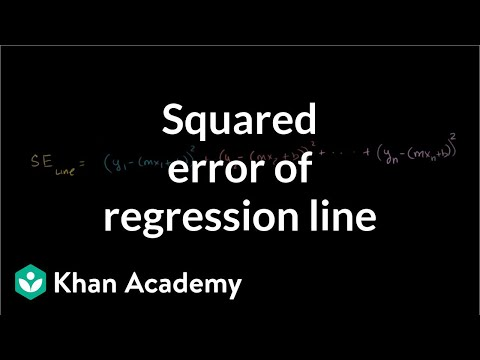

In [3]:
YouTubeVideo('6OvhLPS7rj4', width=560, height=315)

In [ ]:
YouTubeVideo('mIx2Oj5y9Q8', width=560, height=315)

In [ ]:
YouTubeVideo('f6OnoxctvUk', width=560, height=315)

In [ ]:
YouTubeVideo('u1HhUB3NP8g', width=560, height=315)

In [ ]:
YouTubeVideo('8RSTQl0bQuw', width=560, height=315)

In [ ]:
YouTubeVideo('GAmzwIkGFgE', width=560, height=315)

**The last video is optional**

In [ ]:
YouTubeVideo('ww_yT9ckPWw', width=560, height=315)

(215, 209)


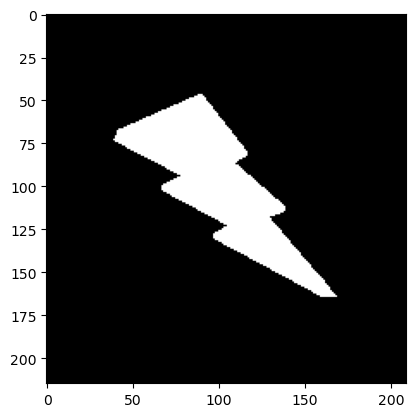

In [5]:
lightningbolt = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
_, lightningbolt = cv2.threshold(lightningbolt,150,255,cv2.THRESH_BINARY)
print(lightningbolt.shape)
fig,ax = plt.subplots()
ax.imshow(lightningbolt, cmap='gray');


In [6]:
np.argwhere


<function argwhere at 0x7b0479eec670>

In [7]:
bolt = np.argwhere(lightningbolt)
print(bolt)

[[ 47  88]
 [ 47  89]
 [ 47  90]
 ...
 [164 166]
 [164 167]
 [164 168]]


## Linear Regression

$$m = \frac{\bar{x}\bar{y} - \overline{xy}}{(\bar{x})^2 - \overline{x^2}}$$

$$b = \bar{y} - m\bar{x}$$

## Question: how can we extract the xs and ys separately from the result of argwhere?

Hint: review numpy slicing by columns and rows

In [8]:
x = np.array(bolt[:, 0])
y = np.array(bolt[:, 1])
nex = x.astype(np.float32)
ney = y.astype(np.float32)

print("xs:\n", nex)
print("ys:\n", ney)



print(np.array([[nex], [ney]]))

xs:
 [ 47.  47.  47. ... 164. 164. 164.]
ys:
 [ 88.  89.  90. ... 166. 167. 168.]
[[[ 47.  47.  47. ... 164. 164. 164.]]

 [[ 88.  89.  90. ... 166. 167. 168.]]]


## Question: Why would we want to convert x and y points from int values to floats?

In [ ]:
#floats support decimal values, this is good for most math like linear regression because it makes it more accurate than int values

In [9]:
def calculate_regression(points): # input is the result of np.argwhere
    # convert points to float
    points = points.astype(np.float32) # (see astype, https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html)
    xs = points[:, [1]] #TODO
    ys = points[:, [0]] #TODO
    x_mean = np.mean(xs) #TODO
    y_mean = np.mean(ys) #TODO
    xy_mean = np.mean(xs*ys) #TODO
    x_squared_mean = np.mean(xs**2) #TODO
    m = ((x_mean*y_mean)-xy_mean) / ((x_mean**2)-(x_squared_mean))
    b = y_mean - m*x_mean 
    return(m,b)

m, b = calculate_regression(bolt) 
print("Slope (m):", m)
print("Intercept (b):", b)










Slope (m): 0.8686638495748333
Intercept (b): 12.298086574527261


The intercept we calculated, $b$, may be outside of the pixel space of the image, so we must find two points inside of pixel space, $(x_1, y_1)$ and $(x2, y2)$ which will allow us to plot our regression line on the image. It may be best to choose points on the regression line which also occur on the boundaries/extrema of the image.

In [10]:
def find_inliers(m, b, shape):
    height, width = shape
    x1 = 0
    y1 = int(m*x1 + b)
    x2 = width - 1
    y2 = int(m*x2 + b)
    y1 = np.clip(y1, 0, height-1)
    y2 = np.clip(y2,0,height-1)


    return x1, y1, x2, y2
# we want to choose two points that fall within the image that allows us to draw the regression line on the image, so the lefgt edge and the right edge so that we can get an idea of the image

(146, 125)


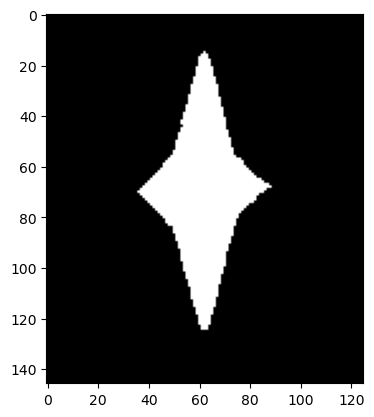

In [11]:
star = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
print(star.shape)

_, star = cv2.threshold(star,125,255,cv2.THRESH_BINARY)
fig,ax = plt.subplots()
ax.imshow(star, cmap='gray');

In [12]:
m,b = calculate_regression(np.argwhere(star))
print()
_ = find_inliers(m,b, star.shape)

print(m,b,_)



-0.033900393266601526 71.71722025498183 (0, 71, 124, 67)


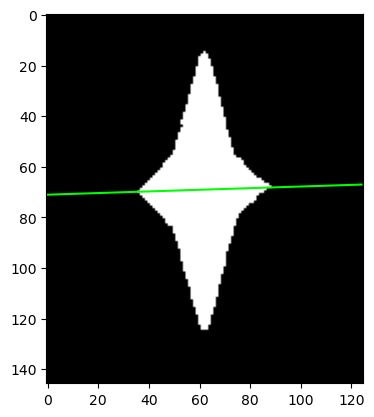

In [17]:
# below is an example of how to draw a random line from (10,25) to (10,55)
# TODO: replace this with the result of find_inliers
# -- pay attention to the directions of the x and y axes 
#    in image space, row-column space, and cartesian space
# Look at the help function for Line2D below

fig,ax = plt.subplots()
ax.imshow(star, cmap='gray');
x1,y1,x2,y2 = _
regression = Line2D([x1,x2],[y1,y2], color='lime')
ax.add_line(regression);

In [15]:
Line2D

matplotlib.lines.Line2D

## TODO

1. Run your linear regression algorithm on the following images. 
2. Plot each of the results. 
3. Include each result in your submitted PDF.

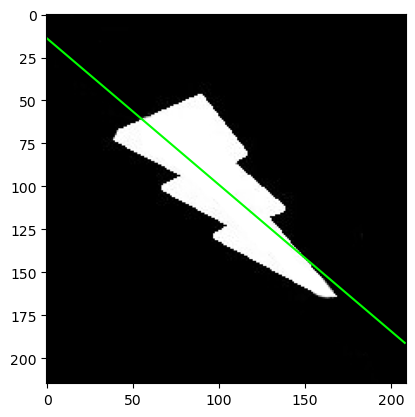

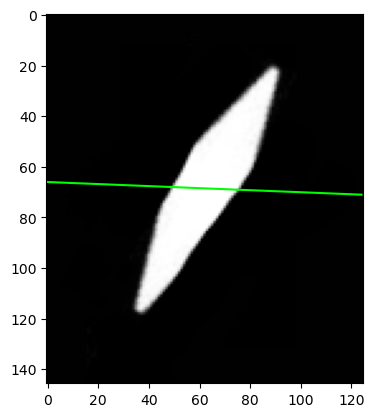

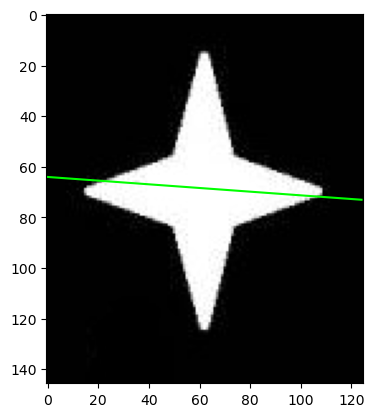

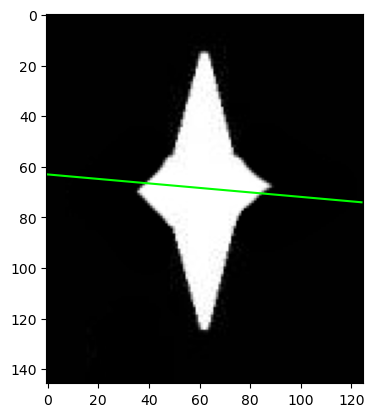

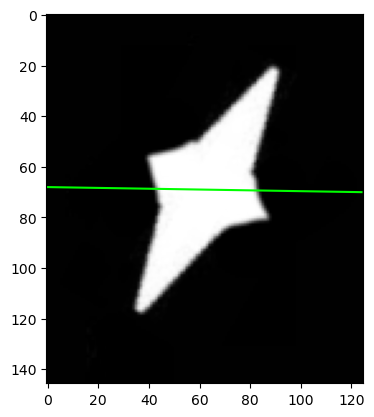

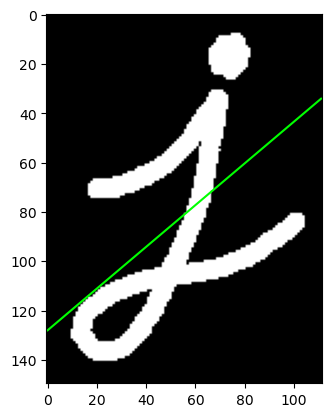

In [42]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

image_names = ["lightningbolt", "blob", "star", "squishedstar", "squishedturnedstar", "letterj"]
images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

for name, img in zip(image_names, images):
    m,b = calculate_regression(np.argwhere(img))
    _, star = cv2.threshold(img,125,255,cv2.THRESH_BINARY)
    fig,ax = plt.subplots()
    ax.imshow(img, cmap='gray');
    _ = find_inliers(m,b, star.shape)
    x1,y1,x2,y2 = _
    regression = Line2D([x1,x2],[y1,y2], color='lime')
    ax.add_line(regression);
 



## When you are done:

You should have six images with regression lines plotted on top of them.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 

## Stretch goal

*Implement a machine learning algorithm!*

**Ran**dom **Sa**mple **C**onsensus, commonly referred to as *RANSAC*, is one of the most widely used machine learning algorithms. In essence, it is a 'guess and check' algorithm. Take a small random sample of your data - two points in this case. Next, define a line through those two points. After doing so, count the number of *inliers*, or points closest to that line (euclidean distance is one way to do this).

https://en.wikipedia.org/wiki/Random_sample_consensus

Implement RANSAC for linear regression, and run it on all of your images.